## Comparing topic modelling techniques

This notebook compares two different advanced topic modelling techniques, in terms of how well they represent our PFD data.<br><br><br>


1. **BERTopic**

BERTopic uses BERT embeddings and clustering algorithms to discover topics. Topics are characterised by dense clusters of semantically similar embeddings, identified through dimensionality reduction and clustering. Although not originally supported, v0.13 (January 2023) also allows us to approximate a probabilistic topic distribution for each report via '.approximate_distribution'.


2. **Top2Vec**

Topics in Top2Vec are characterised by dense clusters of document and word embeddings. These clusters are identified in a joint embedding space, where both documents and words are represented. It does allow for multiple topics per document; this is achieved through the proximity of document embeddings to multiple topic vectors in the semantic space.

Top2Vec uses deep learning-based embeddings (e.g., Doc2Vec, Universal Sentence Encoder) to capture the semantic relationships in the text.<br><br><br>


Neither BERTopic nor Top2Vec require us to pre-specify our number of topics, unlike more classical approaches such as LDA.<br><br><br>




In [1]:
import pandas as pd
import numpy as np

# Read json file
data = pd.read_json('../Data/tokenised.json', orient='split')
data

,URL,CleanContent,ProcessedContent,ProcessedWords,ProcessedSentences,WordEmbeddings
0,https://www.judiciary.uk/prevention-of-future-...,Pre-amble Mr Larsen was a 52 year old male wi...,preamble mr larsen year old male history menta...,"[preamble, mr, larsen, year, old, male, histor...","[[preamble, mr, larsen, year, old, male, histo...","[[0.16015625, 0.0368652344, 0.2578125, 0.12158..."
1,https://www.judiciary.uk/prevention-of-future-...,(1) The process for triaging and prioritising ...,process triaging prioritise ambulance attendan...,"[process, triaging, prioritise, ambulance, att...","[[process, triaging, prioritise, ambulance, at...","[[0.1103515625, 0.255859375, 0.0341796875, -0...."
2,https://www.judiciary.uk/prevention-of-future-...,(1) There are questions and answers on Quora’s...,question answer quoras website provide informa...,"[question, answer, quoras, website, provide, i...","[[question, answer, quoras, website, provide, ...","[[0.1010742188, 0.0991210938, -0.0375976562, 0..."
3,https://www.judiciary.uk/prevention-of-future-...,(1) The prison service instruction (PSI) 64/20...,prison service instruction psi set procedure m...,"[prison, service, instruction, psi, set, proce...","[[prison, service, instruction, psi, set, proc...","[[-0.0356445312, -0.142578125, 0.27734375, -0...."
4,https://www.judiciary.uk/prevention-of-future-...,My principal concern is that when a high-risk ...,principal concern highrisk mental health patie...,"[principal, concern, highrisk, mental, health,...","[[principal, concern, highrisk, mental, health...","[[0.046875, -0.23046875, 0.328125, -0.16308593..."
...,...,...,...,...,...,...
554,https://www.judiciary.uk/prevention-of-future-...,1. Brenda Morris was allowed weekend leave on ...,brenda morris allow weekend leave basis partne...,"[brenda, morris, allow, weekend, leave, basis,...","[[brenda, morris, allow, weekend, leave, basis...","[[0.1376953125, -0.0505371094, 0.154296875, 0...."
555,https://www.judiciary.uk/prevention-of-future-...,Barts and the London 1. Whilst it was clear to...,bart london whilst clear evidence heard inques...,"[bart, london, whilst, clear, evidence, heard,...","[[bart, london, whilst, clear, evidence, heard...","[[-0.0341796875, -0.0971679688, -0.0356445312,..."
559,https://www.judiciary.uk/prevention-of-future-...,1. Piotr Kucharz was a Polish gentleman who co...,piotr kucharz polish gentleman commence living...,"[piotr, kucharz, polish, gentleman, commence, ...","[[piotr, kucharz, polish, gentleman, commence,...","[[-0.0338606723, 0.0229498595, 0.0180945601, 0..."
562,https://www.judiciary.uk/prevention-of-future-...,Camden and Islington Trust 1. It seemed from t...,camden islington trust seem evidence heard cam...,"[camden, islington, trust, seem, evidence, hea...","[[camden, islington, trust, seem, evidence, he...","[[-0.052734375, -0.0030517578000000003, -0.007..."


In [19]:
from bertopic import BERTopic
from umap import UMAP
from sklearn.feature_extraction.text import CountVectorizer

# Create a list of report contents
reports = data['ProcessedContent'].tolist()

# Initialise the vectorizer 
vectorizer_model = CountVectorizer(ngram_range = (1, 3))

# Generate a bigram topic model with 12 top terms
bertopic_model = BERTopic(top_n_words = 12,
                          n_gram_range = (1, 3),
                          #nr_topics = 10, # ...commented out to allow the model to determine the number of topics
                          vectorizer_model = vectorizer_model,
                          umap_model = UMAP(random_state = 230624)) 

# Fit the model to data
topics, probabilities = bertopic_model.fit_transform(reports)

# Find unique topics
unique_topics = set(topics)
num_unique_topics = len(unique_topics)

print(f"Number of unique topics identified: {num_unique_topics}")

# Get topic information
topic_info = bertopic_model.get_topic_info()
print("Topic Info:\n", topic_info)


Number of unique topics identified: 6
Topic Info:
    Topic  Count                                   Name  \
0     -1    179         -1_health_evidence_mental_risk   
1      0    116           0_risk_care_evidence_patient   
2      1     46          1_coroner_action_may_response   
3      2     24  2_mental_health_mental health_concern   
4      3     22             3_prison_prisoner_staff_mr   
5      4     13       4_police_officer_evidence_person   

                                      Representation  \
0  [health, evidence, mental, risk, mental health...   
1  [risk, care, evidence, patient, staff, health,...   
2  [coroner, action, may, response, take, copy, c...   
3  [mental, health, mental health, concern, actio...   
4  [prison, prisoner, staff, mr, system, issue, m...   
5  [police, officer, evidence, person, miss perso...   

                                 Representative_Docs  
0  [referral psychiatric liaison service patient ...  
1  [nang existence clear appropriate po

       Word  Probability    Topic
0      risk     0.019320  Topic 0
1      care     0.015973  Topic 0
2  evidence     0.014933  Topic 0
3   patient     0.014011  Topic 0
4     staff     0.013976  Topic 0
Topic           Topic 0   Topic 1   Topic 2   Topic 3  Topic 4
Bigram                                                        
action         0.000000  0.038142  0.014335  0.000000      0.0
care           0.015973  0.000000  0.000000  0.000000      0.0
chief          0.000000  0.027037  0.000000  0.000000      0.0
chief coroner  0.000000  0.026624  0.000000  0.000000      0.0
concern        0.000000  0.000000  0.014511  0.011235      0.0


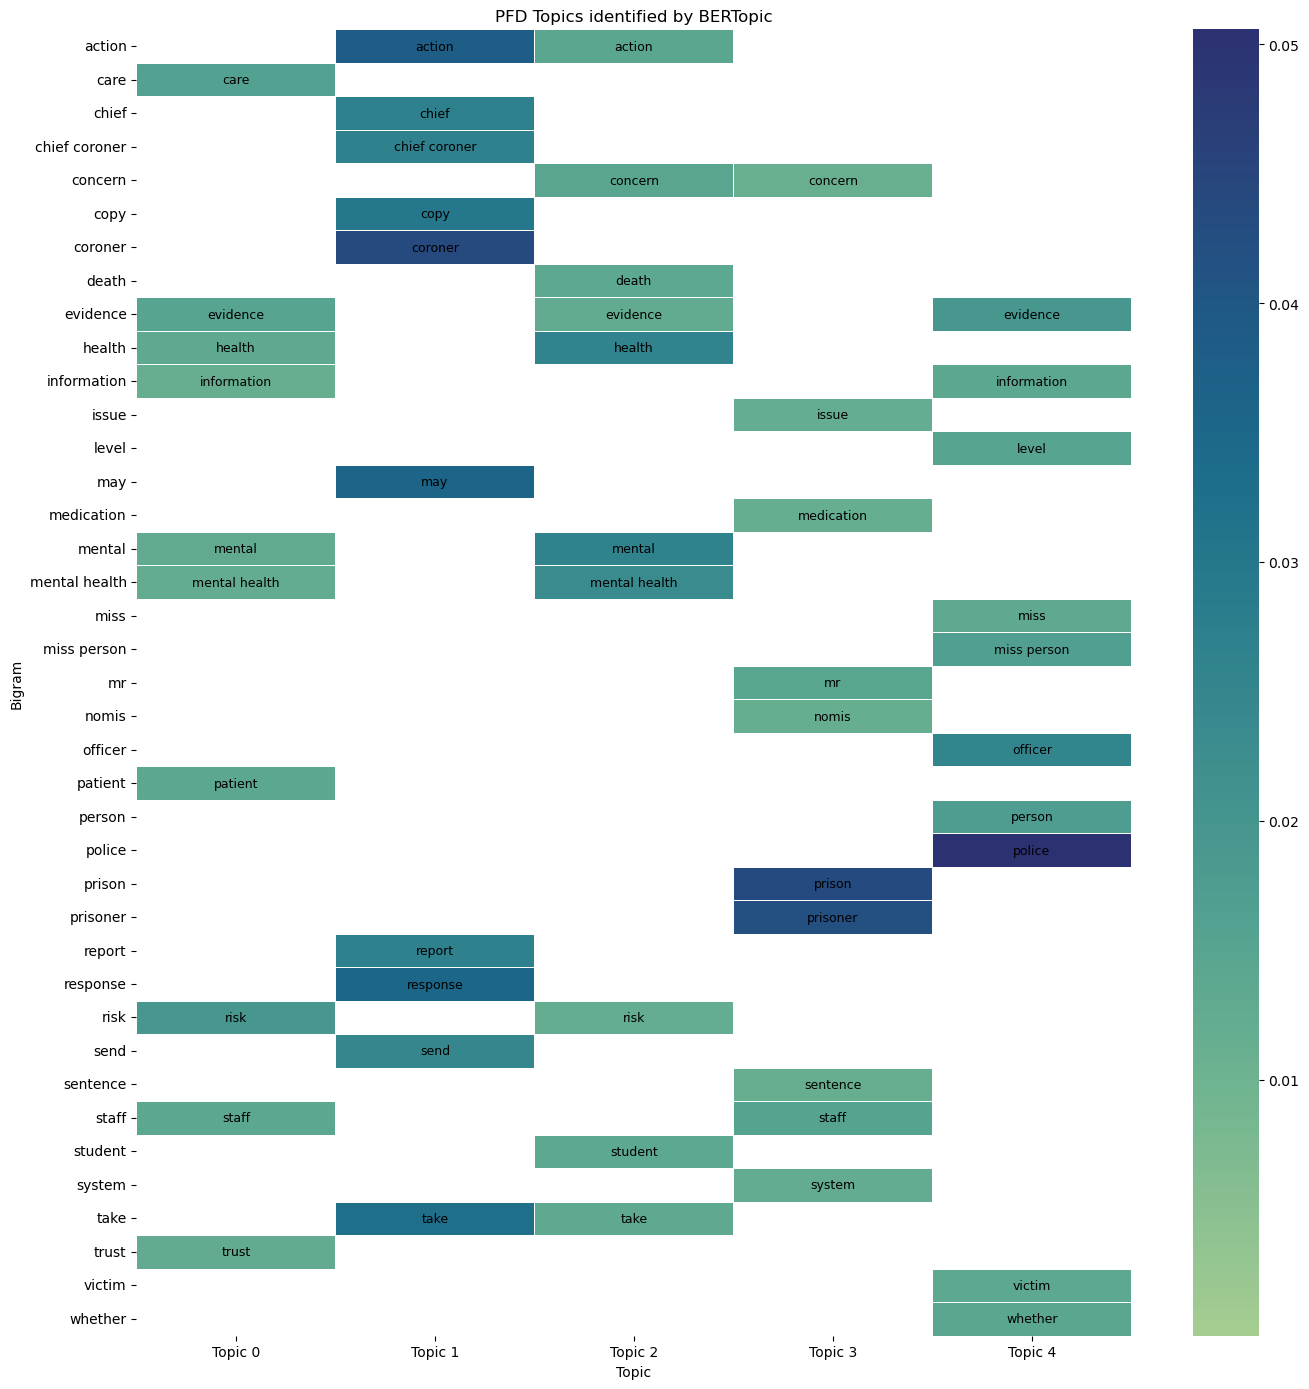

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize DataFrame to store topics data
topics_data = []

# Get unique topics
unique_topics = set(topics)

# Iterate over each unique topic and store the topic data in a DataFrame
for topic_id in unique_topics:
    if topic_id != -1:  # Skip the outlier topic if it exists
        topic_words = bertopic_model.get_topic(topic_id)
        topic_df = pd.DataFrame(topic_words, columns=['Word', 'Probability'])
        topic_df['Topic'] = f'Topic {topic_id}'
        topics_data.append(topic_df)

# Concatenate all topics data into a single DataFrame
topics_df = pd.concat(topics_data, ignore_index=True)

# Check the topics_df content
print(topics_df.head())

# Reshape data from topics DataFrame
reshaped_data = topics_df.rename(columns={'Word': 'Bigram', 'Probability': 'Prob'})

# Set 'Bigram' as index
reshaped_data.set_index('Bigram', inplace=True)

# Create pivot table for heatmap
pivot_table = reshaped_data.pivot(columns='Topic', values='Prob').fillna(0)

# Check the pivot_table content
print(pivot_table.head())

# Plot heatmap
plt.figure(figsize=(14, 14))
cmap = sns.color_palette("crest", as_cmap=True)
cmap.set_under(color='white')

# Generate heatmap
sns.heatmap(pivot_table, cmap=cmap, linewidths=0.5, annot=False,
            cbar=True, mask=(pivot_table == 0), vmin=0.0001)

# Add bigrams with non-zero probability on top of the heatmap
for i, bigram in enumerate(pivot_table.index):
    for j, topic in enumerate(pivot_table.columns):
        if pivot_table.loc[bigram, topic] > 0:
            plt.text(j + 0.5, i + 0.5, bigram, ha='center', va='center',
                     color='black' if pivot_table.loc[bigram, topic] > 0 else 'white', fontsize=9)

# Customize plot
plt.title('PFD Topics identified by BERTopic')
plt.xlabel('Topic')
plt.ylabel('Token')
plt.tight_layout()
plt.show()


### Top2Vec